<a href="https://colab.research.google.com/github/rodrigoviana-ds/Projetos/blob/main/AnaliseExploratoriaDados_Pesquisa_Mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pesquisa de Mercado de Data Science no Brasil feita pela comunidade Data Hackers - Nov/19.**

##**Importação do Conjunto de Dados**

In [ ]:
import pandas as pd

In [ ]:
pip install pandas as pd

In [ ]:
caminho = '/content/datahackers-survey-2019-anonymous-responses.csv'
dados = pd.read_csv(caminho)

In [ ]:
dados.shape # (linhas, colunas)

(1765, 170)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Columns: 170 entries, ('P0', 'id') to ('D6', 'anonymized_role')
dtypes: float64(5), int64(146), object(19)
memory usage: 2.3+ MB


In [ ]:
#Cabeçalho
dados.head(10)

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,

##**Verificando Informações Faltantes no Conjunto de Dados**

In [ ]:
# False = 0 e True = 1
# Variável idade tem 24 informações faltantes, por exemplo
dados.isnull().sum()

('P0', 'id')                             0
('P1', 'age')                           24
('P2', 'gender')                         3
('P3', 'living_in_brasil')               0
('P5', 'living_state')                 337
                                      ... 
('D2', 'origin_macroregion')          1440
('D3', 'anonymized_degree_area')        35
('D4', 'anonymized_market_sector')     243
('D5', 'anonymized_manager_level')    1460
('D6', 'anonymized_role')              514
Length: 170, dtype: int64

In [ ]:
dados.isnull().sum() != 0

('P0', 'id')                          False
('P1', 'age')                          True
('P2', 'gender')                       True
('P3', 'living_in_brasil')            False
('P5', 'living_state')                 True
                                      ...  
('D2', 'origin_macroregion')           True
('D3', 'anonymized_degree_area')       True
('D4', 'anonymized_market_sector')     True
('D5', 'anonymized_manager_level')     True
('D6', 'anonymized_role')              True
Length: 170, dtype: bool

In [ ]:
# Total de linhas faltantes em cada pergunta
dados.isnull().sum()[dados.isnull().sum() != 0]

('P1', 'age')                                      24
('P2', 'gender')                                    3
('P5', 'living_state')                            337
('P6', 'born_or_graduated')                        34
('P12', 'workers_number')                         238
('P13', 'manager')                                238
('P16', 'salary_range')                           238
('P22', 'most_used_proggraming_languages')        859
('P29', 'have_data_warehouse')                    972
('P35', 'data_science_plataforms_preference')     140
('P35', 'other')                                 1625
('P36', 'draw_participation')                       4
('D1', 'living_macroregion')                      337
('D2', 'origin_macroregion')                     1440
('D3', 'anonymized_degree_area')                   35
('D4', 'anonymized_market_sector')                243
('D5', 'anonymized_manager_level')               1460
('D6', 'anonymized_role')                         514
dtype: int64

In [ ]:
#Proporção de linhas faltantes em ordem crescente
(dados.isnull().sum()[dados.isnull().sum() != 0]/dados.shape[0]).sort_values()

('P2', 'gender')                                 0.001700
('P36', 'draw_participation')                    0.002266
('P1', 'age')                                    0.013598
('P6', 'born_or_graduated')                      0.019263
('D3', 'anonymized_degree_area')                 0.019830
('P35', 'data_science_plataforms_preference')    0.079320
('P12', 'workers_number')                        0.134844
('P13', 'manager')                               0.134844
('P16', 'salary_range')                          0.134844
('D4', 'anonymized_market_sector')               0.137677
('P5', 'living_state')                           0.190935
('D1', 'living_macroregion')                     0.190935
('D6', 'anonymized_role')                        0.291218
('P22', 'most_used_proggraming_languages')       0.486686
('P29', 'have_data_warehouse')                   0.550708
('D2', 'origin_macroregion')                     0.815864
('D5', 'anonymized_manager_level')               0.827195
('P35', 'other

#**Quantidade de Entrevistados em cada Profissão**

In [ ]:
dados["('D6', 'anonymized_role')"].value_counts()

Desenvolvedor ou Engenheiro de Software    225
Outras                                     220
Data Scientist/Cientista de Dados          167
Data Analyst/Analista de Dados             163
Business Intelligence/Analista de BI       150
Data Engineer/Engenheiro de Dados          130
Business Analyst/Analista de Negócios       72
Analista de Inteligência de Mercado         29
Engenheiro                                  26
Analista de Marketing                       19
Engenheiro de Machine Learning              15
DBA/Administrador de Banco de Dados         14
Estatístico                                 11
Economista                                  10
Name: ('D6', 'anonymized_role'), dtype: int64

##**Agrupando algumas profissões**

In [ ]:
#Estatístico + Cientista de Dados 
#Outras + Economista + Engenheiro
#Administrador de BD + Engenheiro de Dados


profmap = {'Desenvolvedor ou Engenheiro de Software': 'Desenvolvedor/Engenheiro de Software',
                                            'Outras': 'Outras',
                 'Data Scientist/Cientista de Dados': 'Cientista de Dados',
                    'Data Analyst/Analista de Dados': 'Analista de Dados',
              'Business Intelligence/Analista de BI': 'Analista de BI',
                 'Data Engineer/Engenheiro de Dados': 'Engenheiro de Dados',
            'Bussiness Analyst/Analista de Negócios': 'Analista de BI',
               'Analista de Inteligência de Mercado': 'Analista de BI',
                                        'Engenheiro': 'Outras',
                             'Analista de Marketing': 'Outras',
                    'Engenheiro de Machine Learning': 'Cientista de Dados',
               'DBA/Administrador de Banco de Dados': 'Engenheiro de Dados',
                                       'Estatístico': 'Cientista de Dados',
                                        'Economista': 'Outras'}        

In [ ]:
dados['profissao'] = dados["('D6', 'anonymized_role')"].map(profmap)

##**Criando Conjunto de Dados (Profissão) Através de Alguns Filtros**

In [ ]:
lista = ['Cientista de Dados', 'Analista de Dados', 'Analista de BI', 'Engenheiro de Dados']

pds = dados[dados['profissao'].isin(lista)] #Booleano pra voltar apenas as profissões listadas acima

cds = dados[dados['profissao'] == 'Cientista de Dados']

ads = dados[dados['profissao'] == 'Analista de Dados']

abi = dados[dados['profissao'] == 'Analista de BI']

eds = dados[dados['profissao'] == 'Engenheiro de Dados']


#**Faixa Salarial**

In [ ]:
dados["('P16', 'salary_range')"].value_counts()

de R$ 4.001/mês a R$ 6.000/mês      308
de R$ 8.001/mês a R$ 12.000/mês     237
de R$ 6.001/mês a R$ 8.000/mês      229
de R$ 3.001/mês a R$ 4.000/mês      219
de R$ 1.001/mês a R$ 2.000/mês      181
de R$ 2.001/mês a R$ 3000/mês       150
de R$ 12.001/mês a R$ 16.000/mês     82
Menos de R$ 1.000/mês                48
de R$ 16.001/mês a R$ 20.000/mês     45
de R$ 20.001/mês a R$ 25.000/mês     15
Acima de R$ 25.001/mês               13
Name: ('P16', 'salary_range'), dtype: int64

##**Discretizando o Salário**

In [ ]:
sala_map = {          'Menos de R$ 1.000/mês': 1000,
             'de R$ 1.001/mês a R$ 2.000/mês': 1500,
             'de R$ 2.001/mês a R$ 3.000/mês': 2500,
             'de R$ 3.001/mês a R$ 4.000/mês': 3500,
             'de R$ 4.001/mês a R$ 6.000/mês': 5000,
             'de R$ 6.001/mês a R$ 8.000/mês': 7500,
            'de R$ 8.001/mês a R$ 12.000/mês': 10000,
           'de R$ 12.001/mês a R$ 16.000/mês': 14000,
           'de R$ 16.001/mês a R$ 20.000/mês': 18000, 
            'de R$ 16001/mês a R$ 20.000/mês': 22500,
                     'Acima de R$ 25.001/mês': 25000}

#**Distribuição da Idade**

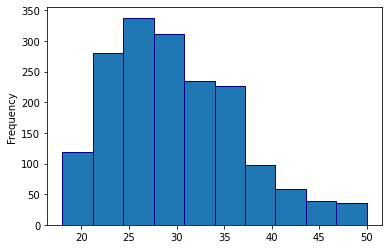

In [ ]:
dados["('P1', 'age')"].plot(kind = 'hist', edgecolor = 'darkblue')

In [ ]:
dados["('P1', 'age')"].describe()

count    1741.000000
mean       29.800689
std         6.595795
min        18.000000
25%        25.000000
50%        29.000000
75%        34.000000
max        50.000000
Name: ('P1', 'age'), dtype: float64

#**Categorizando a Idade**

In [ ]:
cortes = [0, 24, 30, 40, 100]
nomes = ['[18,24]', '[25,30]', '[31,40]', '[40,50]']

#**Tempo de Experiência na Área**

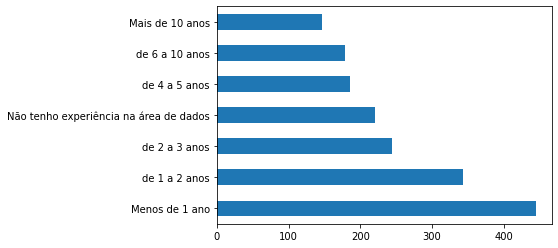

In [ ]:
dados["('P17', 'time_experience_data_science')"].value_counts().plot(kind = 'barh')

##**Recategorizando o Tempo de Experiência**

In [ ]:
tempo_xs_ds = {
                         'Menos de 1 ano': 'Até 1 ano',
 'Não tenho experiência na área de dados': 'Até 1 ano',
                          'de 1 a 2 anos': 'De 1 a 3 anos',
                          'de 2 a 3 anos': 'De 1 a 3 anos',
                          'de 4 a 5 anos': 'De 3 a 5 anos',
                         'de 6 a 10 anos': 'Maior que 5',
                        'Mais de 10 anos': 'Maior que 5'}

##**Determinando o Tamanho da Empresa**

In [ ]:
tammap = { 'de 1 a 5 anos': 'Pequena',
               'de 6 a 10': 'Pequena', 
                 '11 a 50': 'Pequena', 
                '51 a 100': 'Pequena', 
               '101 a 500': 'Média',
              '501 a 1000': 'Média',
          'de 1001 a 3000': 'Grande', 
           'Acima de 3000': 'Grande'}

#**Escolaridade**

In [ ]:
from pandas.api.types import CategoricalDtype

In [ ]:
esc_map = CategoricalDtype(
    ['Prefiro não informar', 'Não tenho graduação formal', 'Estudante de Graduação',
     'Graduação/Bacharelado', 'Pós-graduação', 'Mestrado', 'Doutorado ou Phd'], ordered = True)

#**Criando um Novo DataSet com as Informações de Maior Interesse**

In [ ]:
dados['idade'] = pd.cut(dados["('P1', 'age')"], bins = cortes, labels = nomes)

dados['salario'] = dados["('P16', 'salary_range')"].map(sala_map)

dados['tamanho_da_empresa'] = dados["('P12', 'workers_number')"].map(tammap)

dados['gestor'] = dados["('P13', 'manager')"].map({0: 'não', 1: 'sim'})

dados['se_considera_ds'] = dados["('P19', 'is_data_science_professional')"].map({0: 'não', 1: 'sim'})

dados['sexo'] = dados["('P2', 'gender')"]

dados['experciencia_ds'] = dados["('P17', 'time_experience_data_science')"].map(tempo_xs_ds)

dados['tipo_de_trabalho'] = dados["('P10', 'job_situation')"]

dados['escolaridade'] = dados["('P8', 'degreee_level')"].astype(esc_map)

dados['area_de_formacao'] = dados["('D3', 'anonymized_degree_area')"]

dados['setor_de_mercado'] = dados["('D4', 'anonymized_market_sector')"]

dados['plataforma_favorita'] = dados["('P35', 'data_science_plataforms_preference')"]

##**Salário dos Profissionais de Dados**

###**Salário de um Analista de BI (abi)**

In [ ]:
abi['salario'].describe().round(2)

count      161.00
mean      5018.63
std       3026.39
min       1000.00
25%       3500.00
50%       5000.00
75%       7500.00
max      14000.00
Name: salario, dtype: float64

###**Salário de um Analista de Dados (ads)**

In [ ]:
ads['salario'].describe().round(2)

count      146.00
mean      5393.84
std       2953.79
min       1000.00
25%       3500.00
50%       5000.00
75%       7500.00
max      18000.00
Name: salario, dtype: float64

###**Salário Médio de um Cientista de Dados por Tempo de Experiência**

In [ ]:
cds['salario'].groupby(cds['experciencia_ds']).count()

experciencia_ds
Até 1 ano        35
De 1 a 3 anos    94
De 3 a 5 anos    24
Maior que 5      22
Name: salario, dtype: int64

In [ ]:
cds['salario'].groupby(cds['experciencia_ds']).mean().round(2)

experciencia_ds
Até 1 ano         3900.00
De 1 a 3 anos     6303.19
De 3 a 5 anos    10104.17
Maior que 5      11750.00
Name: salario, dtype: float64

In [ ]:
cds['salario'].groupby(cds['experciencia_ds']).describe()[['count', 'mean']].round(2)

,count,mean
experciencia_ds,,
Até 1 ano,35.0,3900.00
De 1 a 3 anos,94.0,6303.19
De 3 a 5 anos,24.0,10104.17
Maior que 5,22.0,11750.00


###**Salário Médio de Um Cientista de Dados por Sexo**

In [ ]:
cds['salario'].groupby(cds['sexo']).describe()[['count', 'mean']].round(2)

,count,mean
sexo,,
Feminino,28.0,6160.71
Masculino,146.0,7236.30


In [ ]:
cds.groupby(['sexo', 'tamanho_da_empresa']).mean()['salario'].round(2).unstack()

tamanho_da_empresa,Grande,Pequena
sexo,,
Feminino,8785.71,NaN
Masculino,8313.73,4333.33


In [ ]:
cds.groupby(['sexo', 'tamanho_da_empresa']).count()['salario'].round(2).unstack()

tamanho_da_empresa,Grande,Pequena
sexo,,
Feminino,7.0,NaN
Masculino,51.0,9.0


##**Métodos Mais Utilizados por Cientistas de Dados**


In [ ]:
cds.filter(regex = 'P20').sum().sort_values(ascending = False)/cds.shape[0]

('P20', 'linear_regression')             0.740933
('P20', 'logistic_regression')           0.673575
('P20', 'decision_tree')                 0.652850
('P20', 'random_forest')                 0.647668
('P20', 'cluster_analysis')              0.601036
('P20', 'neural_networks')               0.461140
('P20', 'gradient_boosted_machines')     0.445596
('P20', 'ensemble')                      0.398964
('P20', 'nlp')                           0.352332
('P20', 'bayesian_inference')            0.321244
('P20', 'svms')                          0.305699
('P20', 'glms')                          0.290155
('P20', 'rnns')                          0.181347
('P20', 'longitudinal_data_analysis')    0.176166
('P20', 'cnns')                          0.165803
('P20', 'markov_chains')                 0.134715
('P20', 'survival_analysis')             0.134715
('P20', 'joint analysis')                0.067358
('P20', 'gans')                          0.046632
('P20', 'hmms')                          0.041451


##**Métodos Mais Utilizados por Analistas de Dados**

In [ ]:
ads.filter(regex = 'P20').sum().sort_values(ascending = False)/ads.shape[0]

('P20', 'linear_regression')             0.361963
('P20', 'logistic_regression')           0.300613
('P20', 'decision_tree')                 0.276074
('P20', 'cluster_analysis')              0.251534
('P20', 'no_listed_methods')             0.251534
('P20', 'random_forest')                 0.214724
('P20', 'bayesian_inference')            0.159509
('P20', 'nlp')                           0.141104
('P20', 'joint analysis')                0.067485
('P20', 'svms')                          0.067485
('P20', 'neural_networks')               0.067485
('P20', 'gradient_boosted_machines')     0.055215
('P20', 'glms')                          0.055215
('P20', 'ensemble')                      0.042945
('P20', 'survival_analysis')             0.042945
('P20', 'longitudinal_data_analysis')    0.036810
('P20', 'markov_chains')                 0.030675
('P20', 'cnns')                          0.024540
('P20', 'rnns')                          0.012270
('P20', 'gans')                          0.000000


##**Métodos mais utilizados por Profissionais de Dados**

In [ ]:
pds.filter(regex = 'P20').sum().sort_values(ascending = False)/pds.shape[0]

('P20', 'linear_regression')             0.407953
('P20', 'decision_tree')                 0.324006
('P20', 'logistic_regression')           0.322533
('P20', 'cluster_analysis')              0.291605
('P20', 'random_forest')                 0.282769
('P20', 'no_listed_methods')             0.192931
('P20', 'neural_networks')               0.191458
('P20', 'nlp')                           0.188513
('P20', 'bayesian_inference')            0.170839
('P20', 'gradient_boosted_machines')     0.157585
('P20', 'ensemble')                      0.136966
('P20', 'svms')                          0.123711
('P20', 'glms')                          0.104566
('P20', 'cnns')                          0.069219
('P20', 'longitudinal_data_analysis')    0.064801
('P20', 'rnns')                          0.064801
('P20', 'markov_chains')                 0.055965
('P20', 'survival_analysis')             0.055965
('P20', 'joint analysis')                0.051546
('P20', 'hmms')                          0.014728


##**Programas mais Utilizados por Cientistas de Dados**

In [ ]:
cds.filter(regex = 'P21').sum().sort_values(ascending = False)/cds.shape[0]

('P21', 'python')                 0.896373
('P21', 'sql_')                   0.730570
('P21', 'r')                      0.383420
('P21', 'sas_stata')              0.088083
('P21', 'scala')                  0.082902
('P21', 'visual_basic_vba')       0.051813
('P21', 'java')                   0.041451
('P21', 'c_c++_c#')               0.031088
('P21', 'matlab')                 0.025907
('P21', 'julia')                  0.010363
('P21', 'dotnet')                 0.010363
('P21', 'php')                    0.005181
('P21', 'no_listed_languages')    0.000000
dtype: float64

##**Plataformas Mais Utilizadas por Cientistas de Dados**

In [ ]:
cds.filter(regex = 'P34').sum().sort_values(ascending = False)/cds.shape[0]

('P34', 'udemy')             0.663212
('P34', 'coursera')          0.632124
('P34', 'udacity')           0.487047
('P34', 'data_camp')         0.393782
('P34', 'edx')               0.300518
('P34', 'kaggle_learn')      0.295337
('P34', 'height')            0.129534
('P34', 'online_courses')    0.056995
('P34', 'other')             0.046632
('P34', 'data_quest')        0.046632
dtype: float64